# Task 2: Clustering analysis

**Clustering Objective**

Grouping a set of instances such that the instances in the same cluster are more ***similar*** (in some sense) to each other than to those in other clusters.  
The result of a clustering algorithm is a ***clustering***, that is a set of clusters.
Clustering is an ***unsupervised*** task, i.e., the real cluster partitioning is unknown.

Based on the customer’s profile explore the dataset using various clustering techniques. Carefully describe your decisions for each algorithm and which are the advantages provided by the different approaches.

**Different Types of Clusterings and Clusters :**

Principal Types of Clustering:
* **Partitional Clustering:** division into non-overlapping clusters, i.e., each instance is only in one cluster
* Hierarchical Clustering: set of nested clusters organized as a hierarchical tree

Principal Types of Clusters:
* **Center-based:** the calculus is based on a centroid (K-Means)
* **Density-based:** the calculus is based on a concept of neighborhood and density (DBSCAN)

## Task 2.0 : Clustering Preprocessing : Normalization


A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.
The most common adopted normalizations are: Z-Score and Min-Max

In [ ]:
Cusdf = pd.read_csv(r'/content/drive/My Drive/DataMing/Cusdf.csv', index_col=0)
Cusdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 25308 to 538812
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         3512 non-null   int64  
 1   First_Purchase  3512 non-null   int64  
 2   Frequency       3512 non-null   int64  
 3   Monetary        3512 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 137.2 KB


In [ ]:
Cusdf.describe()

,Recency,First_Purchase,Frequency,Monetary
count,3512.000000,3512.000000,3512.000000,3512.000000
mean,93.988610,212.010820,3.310934,739.327428
std,93.200127,104.650883,2.906717,750.717769
min,0.000000,0.000000,1.000000,-419.460000
25%,17.000000,134.000000,1.000000,208.415000
50%,58.500000,235.000000,2.000000,454.155000
75%,152.000000,301.000000,4.000000,1007.810000
max,353.000000,353.000000,16.000000,3664.880000


*Up to now we defined 4 indicators leading to the
construction of a customer profile that can analysis of customer segmentation.*


### *Normalization by Z-Score :*

The z score tells you how many standard deviations from the mean your score is.

If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number.

In [ ]:
# Normalization by Z-Score.
scaler_z = StandardScaler()
scaler_z.fit(Cusdf.values)
X_z = scaler_z.transform(Cusdf.values)
X_z[:5]

array([[-0.79398118,  1.34742539,  4.02197014,  3.45697436],
       [ 2.77948413,  1.34742539, -0.79514542, -0.79706735],
       [ 2.77948413,  1.34742539, -0.79514542, -0.62548711],
       [-0.99787259,  1.34742539,  2.98973109,  3.50601441],
       [-0.42912286,  1.34742539,  1.26933268,  0.28934109]])

### *Normalization by Min-Max :*

Normalization is used to scale the data between 0 and 1.

In [ ]:
# Normalization by Min-Max.
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(Cusdf.values)
X_m[:5]

array([[0.05665722, 1.        , 0.93333333, 0.91902976],
       [1.        , 1.        , 0.        , 0.13723147],
       [1.        , 1.        , 0.        , 0.16876411],
       [0.00283286, 1.        , 0.73333333, 0.92804223],
       [0.1529745 , 1.        , 0.4       , 0.33688919]])

In [ ]:
# Normalization by Min-Max.
Cusdf_m = Cusdf.copy()
Cusdf_m.loc[:,:] = scaler_m.fit_transform(Cusdf_m.values)

## Task 2.1 : Clustering Analysis by K-means




**The Algorithm in a Nutshell**

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/K-Means)
Wikipedia [link](https://en.wikipedia.org/wiki/K-means_clustering)

**K-Means Problems**

* Initial Centroids
* Number of clusters

### 1. Identification of the best value of k

Knee Method to estimate the best K

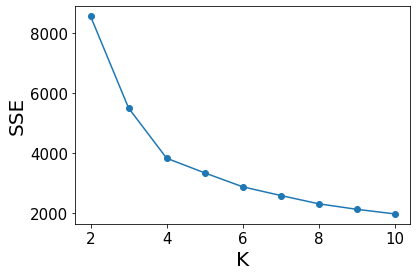

In [ ]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100)
    kmeans.fit(X_z)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Therefore, we choose k = 3 here.

### 2. Characterization of the obtained clusters by using both analysis of the k centroids and comparison of the distribution of variables within the clusters and that in the whole dataset.

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X_m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels:

In [ ]:
kmeans.labels_[:5]

array([1, 0, 0, 1, 1], dtype=int32)

Observing the size of each cluster:

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 967, 1353, 1192]))

In [ ]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 967, 1: 1353, 2: 1192}

Visualization of the clustering in two dimensions.

Text(0, 0.5, 'First_Purchase')

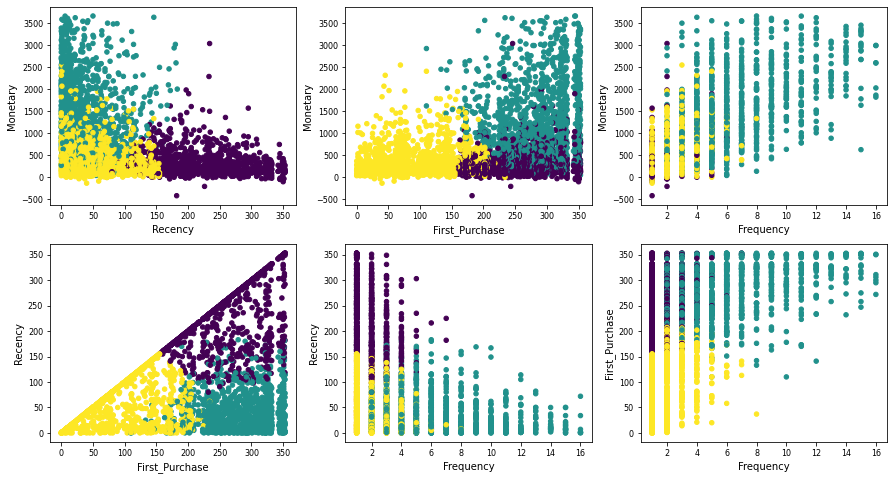

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 8)) 
fig_dims = (2, 3)

# Plot Sale counts
plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(Cusdf['Recency'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Recency', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('First_Purchase', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (0, 2))
plt.scatter(Cusdf['Frequency'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Recency'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('First_Purchase', fontsize=10)
plt.ylabel('Recency', fontsize=10)

plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(Cusdf['Frequency'], Cusdf['Recency'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Recency', fontsize=10)

plt.subplot2grid(fig_dims, (1, 2))
plt.scatter(Cusdf['Frequency'], Cusdf['First_Purchase'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('First_Purchase', fontsize=10)

Centers:

In [ ]:
kmeans.cluster_centers_

array([[0.6353138 , 0.73844518, 0.04267494, 0.18333156],
       [0.11007121, 0.81235278, 0.32264104, 0.42905012],
       [0.1441432 , 0.24841246, 0.05307606, 0.20018432]])

Text(0, 0.5, 'First_Purchase')

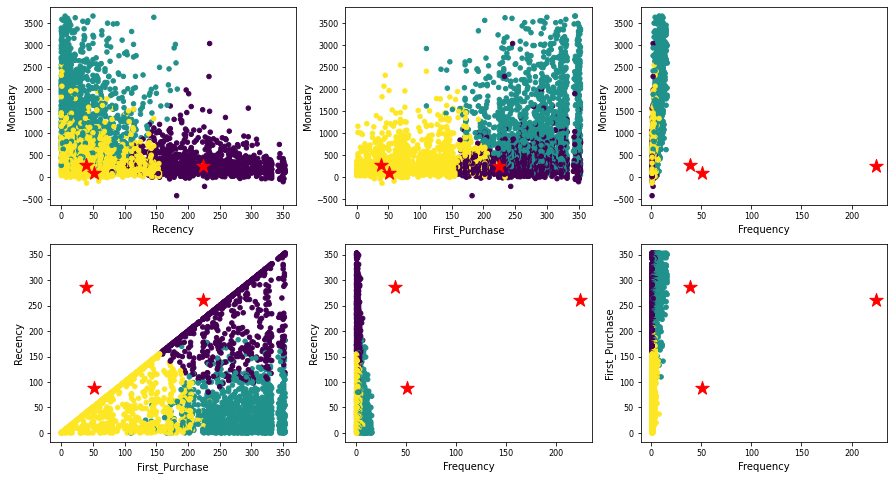

In [ ]:
centers = scaler_m.inverse_transform(kmeans.cluster_centers_)
# Set up a grid of plots
fig = plt.figure(figsize=(15, 8)) 
fig_dims = (2, 3)

# Plot Sale counts
plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(Cusdf['Recency'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Recency', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('First_Purchase', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (0, 2))
plt.scatter(Cusdf['Frequency'], Cusdf['Monetary'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Monetary', fontsize=10)

plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Recency'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('First_Purchase', fontsize=10)
plt.ylabel('Recency', fontsize=10)

plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(Cusdf['Frequency'], Cusdf['Recency'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Recency', fontsize=10)

plt.subplot2grid(fig_dims, (1, 2))
plt.scatter(Cusdf['Frequency'], Cusdf['First_Purchase'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('First_Purchase', fontsize=10)

In [ ]:
centers

array([[ 224.26577042,  260.67114788,    1.6401241 ,  329.32842064],
       [  38.85513673,  286.76053215,    5.83961567, 1332.92658025],
       [  50.88255034,   87.68959732,    1.79614094,  398.16080705]])

Visualization of clusters centers by means of parallel coordinates:

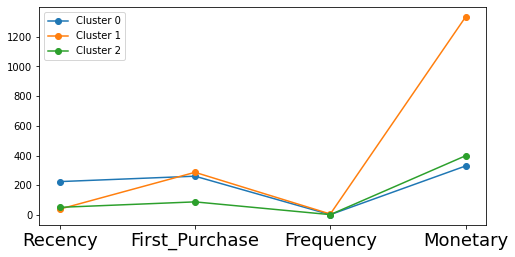

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(Cusdf.columns)), Cusdf.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


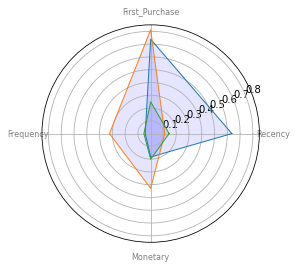

In [ ]:
from math import pi
 
# number of variable
N = len(Cusdf.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = kmeans.cluster_centers_[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], Cusdf.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

* Cluster (1192) : small number of First_Purchase 
* Cluster (967) : large number of Recency 
* Cluster (1353) : large number of Monetary 



### 3. Evaluation of the clustering results

SSE and Clustering Validation

In [ ]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
silhouette_score_kmeans = silhouette_score(X_m, kmeans.labels_)
print('Silhouette %s' % silhouette_score_kmeans)
print('Separation %s' % metrics.davies_bouldin_score(X_m, kmeans.labels_))

SSE 285.1569139364326
Silhouette 0.4440431649824081
Separation 0.8312601408052895


### 2. Comparison of the clustering obtained :
We already analysed the characterization and interpretation of the obtained clusters, hence here we only compare statistics and distribution of each clusters and whole dataset.
* Cluster (1192) : small number of First_Purchase 
* Cluster (967) : large number of Recency 
* Cluster (1353) : large number of Monetary 

#### 1. Add the lable to the dataframe and split dataframe into 3 clusters refer to the result obtained by K-Means.

In [ ]:
# Add the lable to the dataframe
Cusdf['K-Means_Labels'] = kmeans.labels_
# Split dataframe into 3 clusters refer to the result obtained by K-Means.
Cusdf_cluster0 = Cusdf[Cusdf['K-Means_Labels']==0]
Cusdf_cluster1 = Cusdf[Cusdf['K-Means_Labels']==1]
Cusdf_cluster2 = Cusdf[Cusdf['K-Means_Labels']==2]
del Cusdf['K-Means_Labels']

#### 2. Comparing the statistics between each cluster and whole dataset.

*Whole dataset :*

In [ ]:
# Whole dataset
Cusdf.describe()

,Recency,First_Purchase,Frequency,Monetary
count,3512.000000,3512.000000,3512.000000,3512.000000
mean,93.988610,212.010820,3.310934,739.327428
std,93.200127,104.650883,2.906717,750.717769
min,0.000000,0.000000,1.000000,-419.460000
25%,17.000000,134.000000,1.000000,208.415000
50%,58.500000,235.000000,2.000000,454.155000
75%,152.000000,301.000000,4.000000,1007.810000
max,353.000000,353.000000,16.000000,3664.880000


*Cluster 0 :*

In [ ]:
# Cluster 0
Cusdf_cluster0.describe()

,Recency,First_Purchase,Frequency,Monetary,K-Means_Labels
count,967.000000,967.000000,967.000000,967.000000,967.0
mean,224.265770,260.671148,1.640124,329.328421,0.0
std,63.449942,55.946934,0.919516,299.517720,0.0
min,80.000000,156.000000,1.000000,-419.460000,0.0
25%,172.500000,217.000000,1.000000,132.250000,0.0
50%,224.000000,259.000000,1.000000,251.100000,0.0
75%,269.000000,309.000000,2.000000,425.620000,0.0
max,353.000000,353.000000,7.000000,3039.460000,0.0


*Cluster 1 :*

In [ ]:
# Cluster 1
Cusdf_cluster1.describe()

,Recency,First_Purchase,Frequency,Monetary,K-Means_Labels
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.0
mean,38.855137,286.760532,5.839616,1332.926580,1.0
std,35.773755,48.709989,3.132455,845.072577,0.0
min,0.000000,110.000000,2.000000,40.380000,1.0
25%,10.000000,251.000000,3.000000,651.020000,1.0
50%,29.000000,293.000000,5.000000,1150.750000,1.0
75%,59.000000,325.000000,7.000000,1870.900000,1.0
max,183.000000,353.000000,16.000000,3664.880000,1.0


*Cluster 2 :*

In [ ]:
# Cluster 2
Cusdf_cluster2.describe()

,Recency,First_Purchase,Frequency,Monetary,K-Means_Labels
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.0
mean,50.882550,87.689597,1.796141,398.160807,2.0
std,42.374461,57.570758,1.120552,353.100380,0.0
min,0.000000,0.000000,1.000000,-134.800000,2.0
25%,14.000000,40.000000,1.000000,155.242500,2.0
50%,41.000000,77.000000,1.000000,297.465000,2.0
75%,77.000000,139.000000,2.000000,531.040000,2.0
max,155.000000,234.000000,8.000000,2550.430000,2.0


#### 3. Comparing the distribution of each clusters and whole dataset:

*Whole dataset :*
* Recency : right skewed.
* First_Purchase : left skewed.
* Frequency : right skewed.
* Monetary : right skewed.

Text(0.5, 1.0, 'Monetary Histogram')

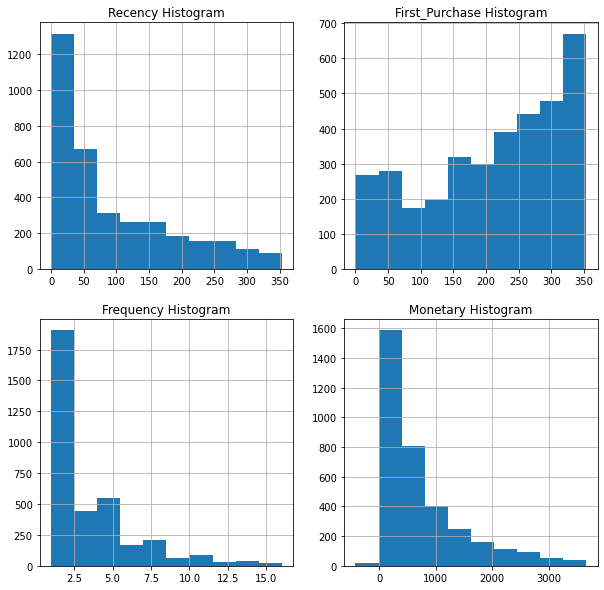

In [ ]:
# Whole dataset
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 0 :*
* Recency : 
* First_Purchase : 
* Frequency : 
* Monetary : 

Text(0.5, 1.0, 'Monetary Histogram')

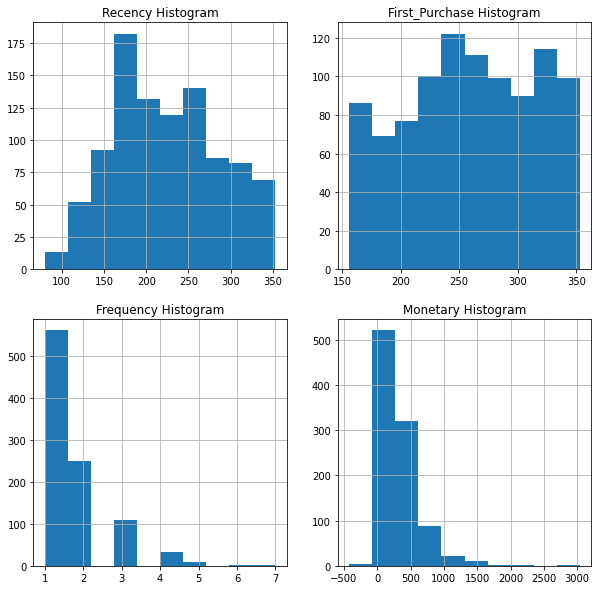

In [ ]:
# Cluster0
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster0['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster0['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster0['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster0['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 1 :*
* Recency :
* First_Purchase : 
* Frequency : 
* Monetary :

Text(0.5, 1.0, 'Monetary Histogram')

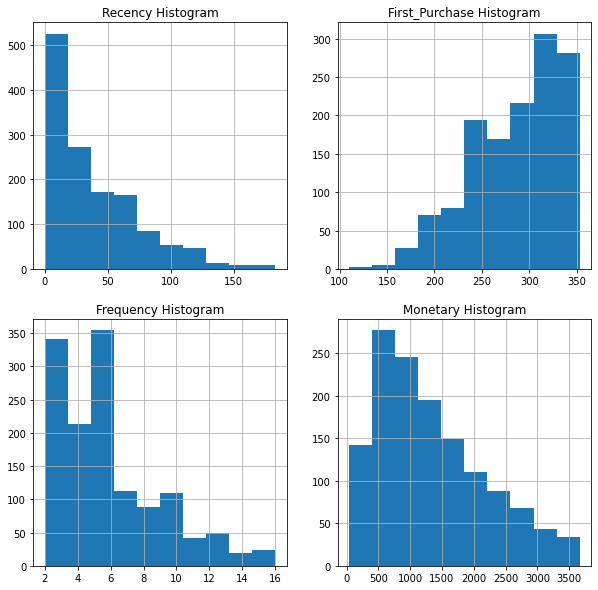

In [ ]:
# Cluster1
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster1['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster1['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster1['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster1['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 2 :*
* Recency :
* First_Purchase :
* Frequency :
* Monetary :

Text(0.5, 1.0, 'Monetary Histogram')

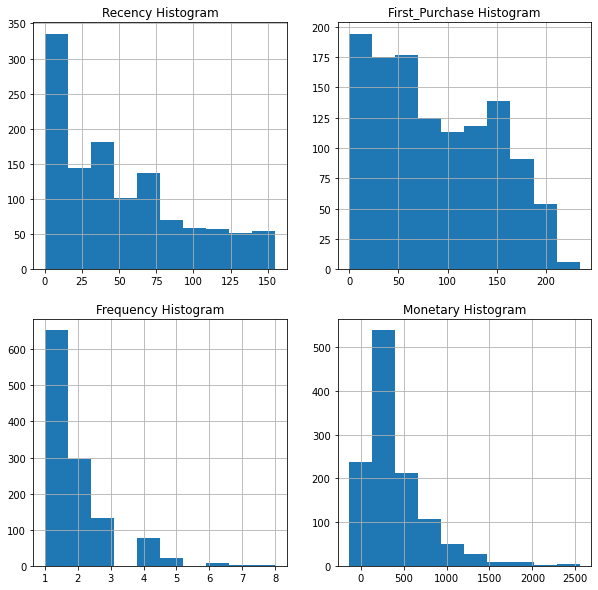

In [ ]:
# Cluster2
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster2['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster2['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster2['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster2['Monetary'].hist()
plt.title('Monetary Histogram')

* Cluster (1192) : small number of First_Purchase 
* Cluster (967) : large number of Recency 
* Cluster (1353) : large number of Monetary 

## Tasks 2.2 : Analysis by density-based clustering

**The Algorithm in a Nutshell**

* A point is a **core** if it has more than minPts points within eps
* A point is a **border** if it has less than minPts points within eps but one of its neighboors is a core point
* A **noise** point is neither a core or a border point


1. Label all points as core, border or noise points
1. Eliminate noise points.
1. Put an edge between all core points that are within eps of each other
1. Make each group of connected core points into a separate cluster.
1. Assign each border point to one of the clusters of its associated core points.

> Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, No. 34, pp. 226-231).

Running [example](http://matlaspisa.isti.cnr.it:5055/Dbscan)  
Wikipedia [link](https://en.wikipedia.org/wiki/DBSCAN)

**DBSCAN Problems**

* Parameter tuning
* Does not recognize different densities

### 1. Study of the clustering parameters

In [ ]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

**Rule of Thumb values for minPts**

A low minPts will create clusters for outliers or noise. A low minPts means it will build more clusters from outliers, therefore we don't choose a too small value for it. minPts is best set by a domain expert who understands the data well. Unfortunately many cases we don't know the domain knowledge, especially after data is normalized. One heuristic approach is using ln(n), where n is the total number of points to be clustered.

In [ ]:
minPts = int(round(np.log(X_m.shape[0])))
print('minPts :', minPts)

minPts : 8


**Knee Method to estimate the best eps with k-distance plot:**

[1.54019975e+00 1.52443604e+00 2.07312051e-01 ... 5.64840341e-02
 5.64742406e-02 9.79350397e-06]

[[0.00000000e+00 1.54019975e+00 1.52443604e+00 ... 1.39798192e+00
  1.42859824e+00 1.42859280e+00]
 [1.54019975e+00 0.00000000e+00 3.15326344e-02 ... 9.74517039e-01
  9.73603985e-01 9.73603860e-01]
 [1.52443604e+00 3.15326344e-02 0.00000000e+00 ... 9.73603452e-01
  9.74518919e-01 9.74518476e-01]
 ...
 [1.39798192e+00 9.74517039e-01 9.73603452e-01 ... 0.00000000e+00
  5.64840341e-02 5.64742406e-02]
 [1.42859824e+00 9.73603985e-01 9.74518919e-01 ... 5.64840341e-02
  0.00000000e+00 9.79350397e-06]
 [1.42859280e+00 9.73603860e-01 9.74518476e-01 ... 5.64742406e-02
  9.79350397e-06 0.00000000e+00]]


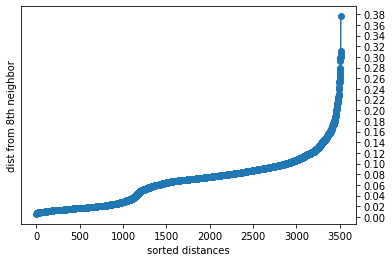

In [ ]:
# Knee Method to estimate the best eps
from scipy.spatial.distance import pdist, squareform
dist = pdist(X_m, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = minPts
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
plt.plot(range(0, len(kth_distances)), sorted(kth_distances), '-o')
plt.ylabel('dist from %sth neighbor' % k, fontsize=10)
plt.xlabel('sorted distances', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(np.arange(0,0.4,step=0.02))
plt.show()

The optimal value for epsilon will be found at the point of maximum curvature. Therefore, we choose eps = 0.15 here.

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=minPts)
dbscan.fit(X_m)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

### 2. Characterization and interpretation of the obtained clusters

Labels:

In [ ]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0])

Observing the size of each cluster:

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([  48, 3464]))

In [ ]:
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_))))
print('labels :', dict(zip(bins, hist)))

labels : {-1: 48, 0: 3464}


* Cluster label -1 : outliers
* Cluster label 0 : other data

Visualization of the clustering in two dimensions:

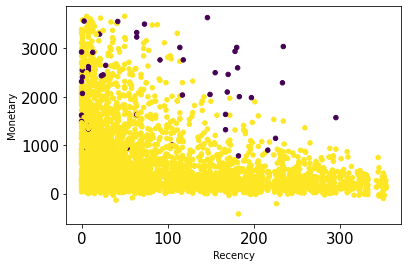

In [ ]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.scatter(Cusdf['Recency'], Cusdf['Monetary'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Recency', fontsize=10)
plt.ylabel('Monetary', fontsize=10)
plt.show()

Clustering Validation:

In [ ]:
silhouette_score_dbscan = silhouette_score(X_m, dbscan.labels_)
print('Silhouette %s' % silhouette_score_dbscan)

Silhouette 0.19828768345314204


## Task 2.3 : Analysis by hierarchical clustering



Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: 
1. identify the two clusters that are closest together, and
2. merge the two most similar clusters. 

This iterative process continues until all the clusters are merged together.

### 1. Compare different clustering results got by using different version of the algorithm

We choose the n_clusters=3 compare to the result of K-means, and Euclidean distance as the measures of distance.

In [ ]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# ward linkage
print('ward linkage :')
ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')#, connectivity=connectivity)
ward.fit(X_m)
hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels :', dict(zip(bins, hist)))
silhouette_score_ward_linkage = silhouette_score(X_m, ward.labels_)
print ('silhouette :', silhouette_score_ward_linkage)
print()

# single linkage
print('single linkage :')
single = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='euclidean')#, connectivity=connectivity)
single.fit(X_m)
hist, bins = np.histogram(single.labels_, bins=range(0, len(set(single.labels_)) + 1))
print ('labels :', dict(zip(bins, hist)))
silhouette_score_single_linkage = silhouette_score(X_m, single.labels_)
print ('silhouette :', silhouette_score_single_linkage)
print()

# average linkage
print('average linkage :')
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
average_linkage.fit(X_m)
hist, bins = np.histogram(average_linkage.labels_, bins=range(0, len(set(average_linkage.labels_)) + 1))
print('labels :', dict(zip(bins, hist)))
silhouette_score_average_linkage = silhouette_score(X_m, average_linkage.labels_)
print('silhouette :', silhouette_score_average_linkage)
print()

# complete linkage
print('complete linkage :')
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
complete_linkage.fit(X_m)
hist, bins = np.histogram(complete_linkage.labels_, bins=range(0, len(set(complete_linkage.labels_)) + 1))
print('labels :', dict(zip(bins, hist)))
silhouette_score_complete_linkage = silhouette_score(X_m, complete_linkage.labels_)
print('silhouette :', silhouette_score_complete_linkage)
print()

ward linkage :
labels : {0: 1422, 1: 1163, 2: 927}
silhouette : 0.41294506482905013

single linkage :
labels : {0: 3510, 1: 1, 2: 1}
silhouette : 0.09603654916388092

average linkage :
labels : {0: 3028, 1: 1, 2: 483}
silhouette : 0.23301758434831524

complete linkage :
labels : {0: 1221, 1: 1334, 2: 957}
silhouette : 0.4118252541626991



From the results, we noticed that the 'ward linkage' and 'complete linkage' methods got a better silhouette score than the 'average linkage' method.

### 2. Show and discuss different dendrograms using different algorithms.

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters.

**Linkage Criteria** determines from where distance is computed. 

The distance can be computed between the two most similar parts of a cluster (**single-linkage**), the two least similar bits of a cluster (**complete-linkage**), the center of the clusters (**mean or average-linkage**), or some other criterion.

**The choice of linkage criteria :** **Ward’s method** is the sensible default. This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics.

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

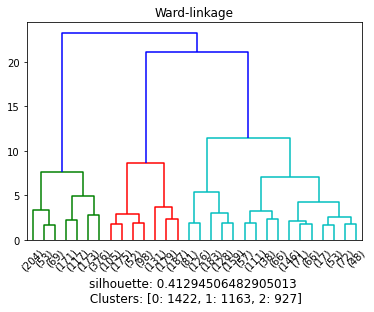

In [ ]:
data_dist = pdist(X_m, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=20, truncate_mode='lastp')
plt.xlabel("silhouette: {} \n Clusters: [0: 1422, 1: 1163, 2: 927]".format(silhouette_score_ward_linkage),fontsize=12)
plt.title("Ward-linkage")
plt.show()

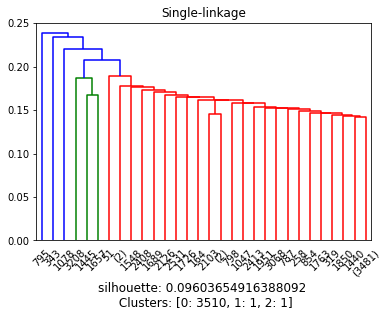

In [ ]:
data_dist = pdist(X_m, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')
plt.xlabel("silhouette: {} \n Clusters: [0: 3510, 1: 1, 2: 1]".format(silhouette_score_single_linkage),fontsize=12)
plt.title("Single-linkage")
plt.show()

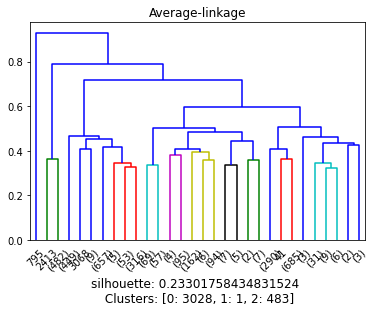

In [ ]:
data_dist = pdist(X_m, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')
plt.xlabel("silhouette: {} \n Clusters: [0: 3028, 1: 1, 2: 483]".format(silhouette_score_average_linkage),fontsize=12)
plt.title("Average-linkage")
plt.show()

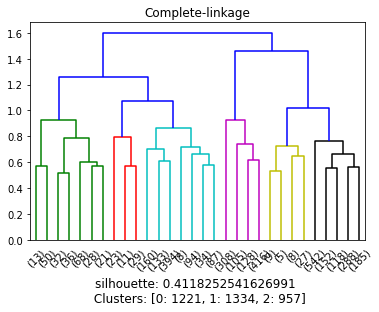

In [ ]:
data_dist = pdist(X_m, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')
plt.xlabel("silhouette: {} \n Clusters: [0: 1221, 1: 1334, 2: 957]".format(silhouette_score_complete_linkage),fontsize=12)
plt.title("Complete-linkage")
plt.show()

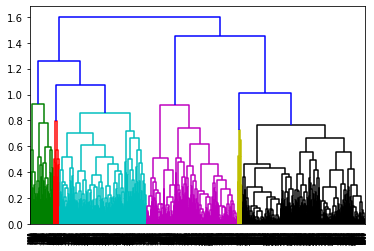

In [ ]:
res = dendrogram(data_link, color_threshold=1.0)

**Conclusion :** 

From the figures plotted above and the silhouette score, we can conclude that the 'single linkage' method and 'complete linkage' methods have an intuitive and reasonable dendrogram as while as a better silhouette score than 'average linkage' method from the domain of the dataset.

## Task 2.4 (Optional) : Explore Pyclustering tool

Explore the opportunity to use alternative clustering techniques in the library: https://github.com/annoviko/pyclustering/

**K-Medoids (PAM - Partitioning Around Medoids) :**

PAM is a partitioning clustering algorithm that uses the medoids instead of centers like in case of K-Means algorithm.

Medoid is an object with the smallest dissimilarity to all others in the cluster.

### 1. Study of the clustering parameters

*Constructor of clustering algorithm K-Medoids:*

**Parameters:**
* [in]	data	(list): Input data that is presented as list of points (objects), each point should be represented by list or tuple.
* [in]	initial_index_medoids	(list): Indexes of intial medoids (indexes of points in input data).
* [in]	tolerance	(double): Stop condition: if maximum value of distance change of medoids of clusters is less than tolerance than algorithm will stop processing.
* [in]	ccore	(bool): If specified than CCORE library (C++ pyclustering library) is used for clustering instead of Python code.
* [in]	**kwargs	Arbitrary keyword arguments (available arguments: 'metric', 'data_type', 'itermax').

**Keyword Args:**
* metric (distance_metric): Metric that is used for distance calculation between two points.
* data_type (string): Data type of input sample 'data' that is processed by the algorithm ('points', 'distance_matrix').
itermax (uint): Maximum number of iteration for cluster analysis.

Both the k -means and k -medoids algorithms are partitional (breaking the dataset up into groups). K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster.

The K-means clustering algorithm is sensitive to outliers, because a mean is easily influenced by extreme values. K-medoids clustering is a variant of K-means that is more robust to noises and outliers. Instead of using the mean point as the center of a cluster, K-medoids uses an actual point in the cluster to represent it. Medoid is the most centrally located object of the cluster, with minimum sum of distances to other points. 

In [ ]:
!pip3 install pyclustering

labels : {0: 1310, 1: 914, 2: 1288}


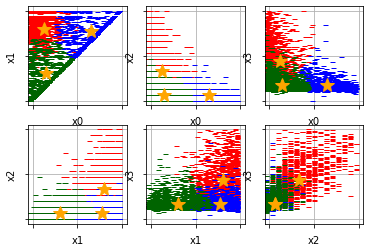

In [ ]:
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.silhouette import silhouette

# load list of points for cluster analysis
sample = X_m.tolist()

# initialize
initial_medoids = kmeans_plusplus_initializer(sample, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize(return_index=True)

# create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(sample, initial_medoids)

# run cluster analysis and obtain results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

hist, bins = [len(clusters[i]) for i in range(len(clusters))], [i for i in range(len(clusters))]
print('labels :', dict(zip(bins, hist)))

# visualize clustering results
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample, 0)
# plot initial_medoids in purple and final medoids in orange
#visualizer.append_cluster([sample[index] for index in initial_medoids], marker='*', markersize=15, color='purple')
visualizer.append_cluster(medoids, data=sample, marker='*', markersize=15, color='orange')
visualizer.show(max_row_size=3)

*Scatter plot with initial_medoids in purple and final medoids in orange.*

### 2. Characterization and interpretation of the obtained clusters


#### Visualization of clusters medoids by means of parallel coordinates:

Medoids in obtained clusters:
Medoids 0 :  [  45.    283.      6.   1365.29]
Medoids 1 :  [230.   273.     2.   276.28]
Medoids 2 :  [ 53.  108.    2.  280.9]

Medoids after Feature scaling:
Medoids 0 :  [0.12747875 0.80169972 0.33333333 0.43697391]
Medoids 1 :  [0.65155807 0.7733711  0.06666667 0.17034331]
Medoids 2 :  [0.15014164 0.30594901 0.06666667 0.17147446]



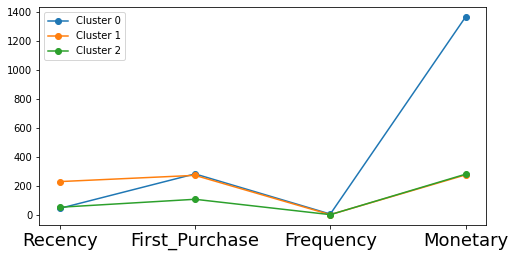

In [ ]:
cluster_medoids_ = np.array([X_m[i] for i in medoids])
medoids_ = scaler_m.inverse_transform(cluster_medoids_)

# Medoids
print("Medoids in obtained clusters:")
for i in range(len(medoids)):
  print("Medoids",i,": ", medoids_[i])
print()

# Medoids after Feature scaling:
print("Medoids after Feature scaling:")
for i in range(len(medoids)):
  print("Medoids",i,": ", cluster_medoids_[i])
print()

plt.figure(figsize=(8, 4))
for i in range(0, len(medoids_)):
    plt.plot(medoids_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(Cusdf.columns)), Cusdf.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


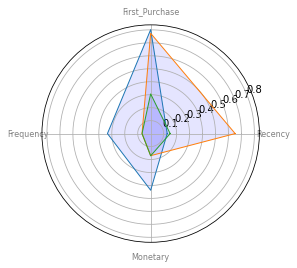

In [ ]:
from math import pi
 
# number of variable
N = len(Cusdf.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(medoids_)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = cluster_medoids_[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], Cusdf.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

* Cluster (914) : large number of Recency 
* Cluster (1310) : large number of Monetary 
* Cluster (1288) : small number of First_Purchase 

#### Evaluation of the clustering results

In [ ]:
# Calculate Silhouette score
silhouette_score_kmedoids = np.mean(silhouette(sample, clusters).process().get_score())
print ('silhouette', silhouette_score_kmedoids)

silhouette 0.6188306624686812


From the figure above, we noticed that the characterzation of the obtained clustes are quite similar with the results we got from K-Means, but it has a highest silhouette score.

## Task 2.5 : Final evaluation of the best clustering approach and comparison of the clustering obtained

#### 1. Final evaluation of the best clustering approach :

In [ ]:
silhouette_score_hierachical = max(silhouette_score_single_linkage, silhouette_score_ward_linkage, silhouette_score_average_linkage, silhouette_score_complete_linkage)
print('silhouette score of kmeans :',silhouette_score_kmeans)
print('silhouette score of dbscan :',silhouette_score_dbscan)
print('silhouette score of hierachical :',silhouette_score_hierachical)
print('silhouette score of kmedoids :',silhouette_score_kmedoids)

silhouette score of kmeans : 0.4440431649824081
silhouette score of dbscan : 0.19828768345314204
silhouette score of hierachical : 0.41294506482905013
silhouette score of kmedoids : 0.6188306624686812


From the results we computed above, we can conclude:
* **K-Medoids** clustering algorithm gained the best silhouette score in the experiments, 
* **K-Means** clustering algorithm obtained the similar clusters as be a partitioning clustering algorithm as K-Medoids,
* **DBScan** clustering algorithm identified the outliers inside the dataset, 
* **Hierachical** clustering algorithm (**Ward linkage and complete linkage**) gave the most intuitive and reseanable dendrograms from the domain of dataset.

### 2. Comparison of the clustering obtained :
We already analysed the characterization and interpretation of the obtained clusters, hence here we only compare statistics and distribution of each clusters and whole dataset.
* Cluster (914) : large number of Recency 
* Cluster (1310) : large number of Monetary 
* Cluster (1288) : small number of First_Purchase 

#### 1. Add the lable to the dataframe and split dataframe into 3 clusters refer to the result obtained by K-Medoids.

In [ ]:
# Add the lable to the dataframe

lables = [None]*len(Cusdf)
for i in range(len(Cusdf)):
  if i in clusters[0]:
    lables[i] = 0
  elif i in clusters[1]:
    lables[i] = 1
  elif i in clusters[2]:
    lables[i] = 2
  else:
    print("Error occured !")

# Split dataframe into 3 clusters refer to the result obtained by K-Medoids.
Cusdf['Labels'] = lables
Cusdf_cluster0 = Cusdf[Cusdf['Labels']==0]
Cusdf_cluster1 = Cusdf[Cusdf['Labels']==1]
Cusdf_cluster2 = Cusdf[Cusdf['Labels']==2]
print(len(Cusdf_cluster0), len(Cusdf_cluster1), len(Cusdf_cluster2))

1310 914 1288


#### 2. Comparing the statistics between each cluster and whole dataset.

*Whole dataset :*

In [ ]:
# Whole dataset
Cusdf.describe()

,Recency,First_Purchase,Frequency,Monetary,Labels
count,3512.000000,3512.000000,3512.000000,3512.000000,3512.000000
mean,93.988610,212.010820,3.310934,739.327428,0.993736
std,93.200127,104.650883,2.906717,750.717769,0.860187
min,0.000000,0.000000,1.000000,-419.460000,0.000000
25%,17.000000,134.000000,1.000000,208.415000,0.000000
50%,58.500000,235.000000,2.000000,454.155000,1.000000
75%,152.000000,301.000000,4.000000,1007.810000,2.000000
max,353.000000,353.000000,16.000000,3664.880000,2.000000


*Cluster 0 :*

In [ ]:
# Cluster 0
Cusdf_cluster0.describe()

,Recency,First_Purchase,Frequency,Monetary,Labels
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.0
mean,38.910687,288.889313,5.934351,1363.055537,0.0
std,36.084450,47.805732,3.131734,842.409797,0.0
min,0.000000,110.000000,2.000000,50.070000,0.0
25%,10.000000,255.000000,4.000000,687.627500,0.0
50%,28.500000,295.000000,5.000000,1196.935000,0.0
75%,59.000000,325.750000,8.000000,1912.042500,0.0
max,183.000000,353.000000,16.000000,3664.880000,0.0


*Cluster 1 :*

In [ ]:
# Cluster 1
Cusdf_cluster1.describe()

,Recency,First_Purchase,Frequency,Monetary,Labels
count,914.000000,914.000000,914.000000,914.000000,914.0
mean,228.846827,265.575492,1.644420,331.172344,1.0
std,62.004050,53.617640,0.931049,303.045748,0.0
min,97.000000,166.000000,1.000000,-419.460000,1.0
25%,178.000000,226.250000,1.000000,132.075000,1.0
50%,229.500000,265.000000,1.000000,251.980000,1.0
75%,273.000000,310.000000,2.000000,427.387500,1.0
max,353.000000,353.000000,7.000000,3039.460000,1.0


*Cluster 2 :*

In [ ]:
# Cluster 2
Cusdf_cluster2.describe()

,Recency,First_Purchase,Frequency,Monetary,Labels
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.0
mean,54.308230,95.808230,1.825311,394.583581,2.0
std,45.448167,62.818071,1.128047,342.481127,0.0
min,0.000000,0.000000,1.000000,-134.800000,2.0
25%,15.000000,42.000000,1.000000,156.525000,2.0
50%,42.500000,82.500000,1.000000,297.125000,2.0
75%,81.000000,146.000000,2.000000,522.357500,2.0
max,164.000000,248.000000,8.000000,2550.430000,2.0


#### 3. Comparing the distribution of each clusters and whole dataset:

*Whole dataset :*
* Recency : right skewed.
* First_Purchase : left skewed.
* Frequency : right skewed.
* Monetary : right skewed.

Text(0.5, 1.0, 'Monetary Histogram')

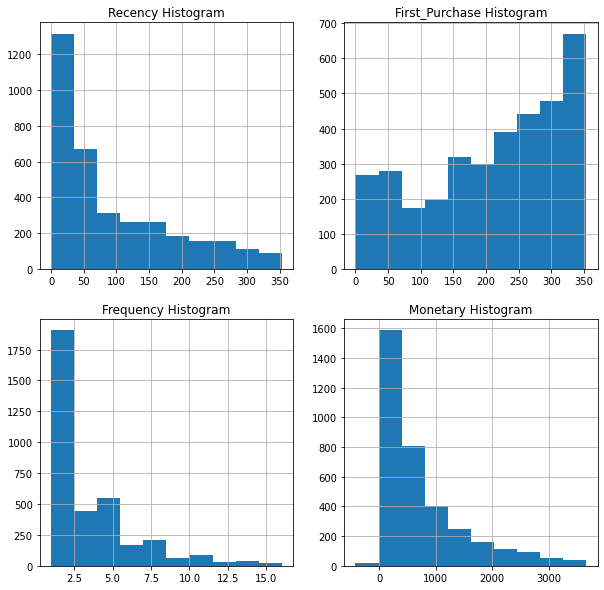

In [ ]:
# Whole dataset
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 0 :*
* Recency : approximate normal distribution.
* First_Purchase : approximate normal distribution.
* Frequency : right skewed.
* Monetary : right skewed.

Text(0.5, 1.0, 'Monetary Histogram')

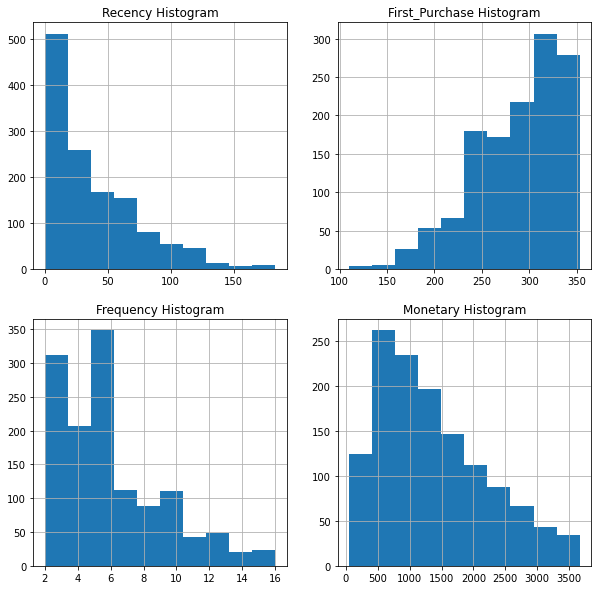

In [ ]:
# Cluster0
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster0['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster0['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster0['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster0['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 1 :*
* Recency :  right skewed.
* First_Purchase : left skewed.
* Frequency : approximate normal distribution.
* Monetary : approximate normal distribution.

Text(0.5, 1.0, 'Monetary Histogram')

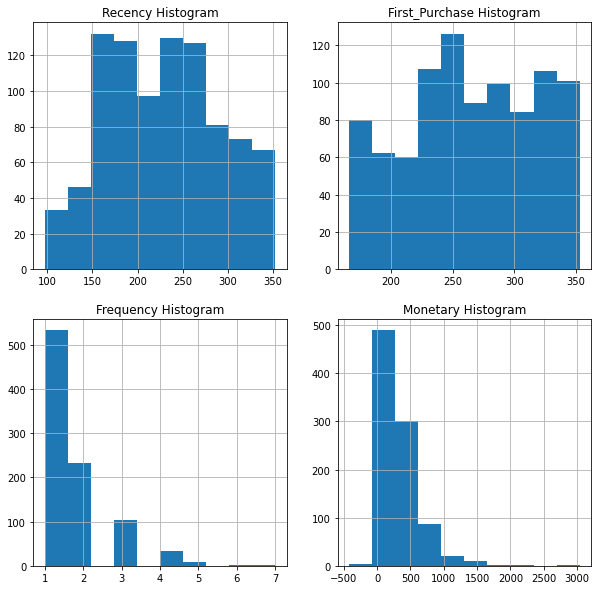

In [ ]:
# Cluster1
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster1['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster1['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster1['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster1['Monetary'].hist()
plt.title('Monetary Histogram')

*Cluster 2 :*
* Recency :  right skewed.
* First_Purchase : right skewed.
* Frequency : right skewed.
* Monetary : approximate normal distribution.

Text(0.5, 1.0, 'Monetary Histogram')

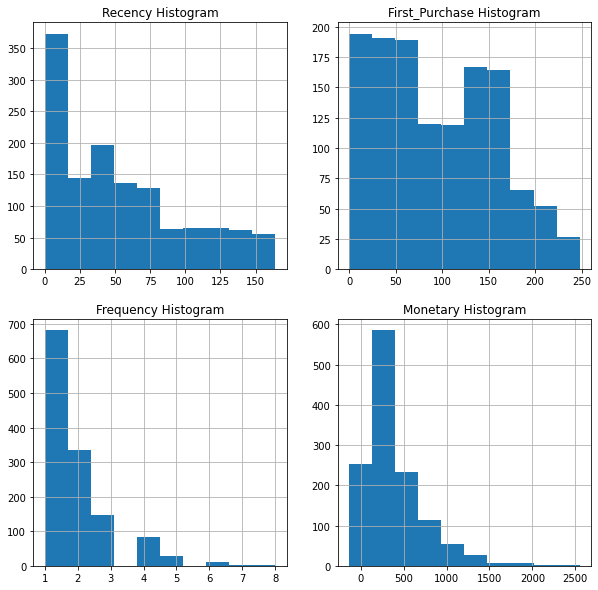

In [ ]:
# Cluster2
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf_cluster2['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf_cluster2['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf_cluster2['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf_cluster2['Monetary'].hist()
plt.title('Monetary Histogram')

From the statistics and distribution of each clusters, we conclude :

* **Cluster (914)** : has a large number mean of Recency, which indicate the group of customer who did not purchase recently.
* **Cluster (1310)** : has a large number mean of Monetary, which indicate the group of customer who are the big buyers.
* **Cluster (1288)** : has a small number mean of First_Purchase, which indicate the group of new customers.